# 통계와 선형대수

**주요 내용**

- 선형대수: 행렬곱
- 난수 생성
- 예제: 넘파이 주요 메서드 활용

**기본 설정**

`numpy` 모듈과 시각화 도구 모듈인 `matplotlib.pyplot`에 대한 기본 설정을 지정한다.

In [1]:
# 넘파이
import numpy as np

# 램덤 시드
np.random.seed(12345)

# 어레이 사용되는 부동소수점들의 정확도 지정
np.set_printoptions(precision=4, suppress=True)

# 파이플롯
import matplotlib.pyplot as plt

# 도표 크기 지정
plt.rc('figure', figsize=(10, 6))

## 4.5 선형 대수 (p. 172)

행렬 곱셈, 전치 행렬, 역행렬 등을 2차원 어레이로 계산하는 방식을 
간단한 예제를 이용하여 소개한다.

#### 행렬곱

먼저 두 개의 행렬을 2차원 어레이로 구현하자.
행렬 `x`는 (2, 3) 모양의 2차원 어레이다.

$$
\text{x} =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
$$

In [60]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

행렬 `y`는 (3, 2) 모양의 2차원 어레이다.

$$
\text{y} = 
\begin{bmatrix}
6 & 23 \\
-1 & 7 \\
8 & 9
\end{bmatrix}
$$

In [61]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

두 행렬의 곱 `x y`는 `dot()` 메서드를 이용하여 구한다.
결과는 (2, 2) 모양의 어레이다.

$$
\text{x y} =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
\begin{bmatrix}
6 & 23 \\
-1 & 7 \\
8 & 9
\end{bmatrix}
=
\begin{bmatrix}
28 & 64\\
67 & 181
\end{bmatrix}
$$

In [62]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

`np.dot()` 함수를 이용해도 동일한 결과를 얻는다.

In [63]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

#### `@` 연산자

`np.dot()` 함수 대신 `@` 기호를 중위 연산자로 사용할 수 있다.

In [64]:
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

#### 전치 행렬

전치 행렬은 주어진 행렬의 행과 열을 서로 교환해서 얻어진다.

$$
\begin{bmatrix}
    1 & 2 \\
    3 & 4 \\
    5 & 6
\end{bmatrix}^{\,T}
=
\begin{bmatrix}
    1 & 3 & 5 \\
    2 & 4 & 6
\end{bmatrix}
$$

위 전치 행렬에 사용된 2차원 어레이는 아래처럼 생성할 수 있다.

In [65]:
x = np.arange(1, 7).reshape((3, 2))
x

array([[1, 2],
       [3, 4],
       [5, 6]])

전치 행렬은 전치 어레이로 구현된다.

In [66]:
x.T

array([[1, 3, 5],
       [2, 4, 6]])

In [67]:
y = np.arange(-6, 0).reshape((2, 3))
y

array([[-6, -5, -4],
       [-3, -2, -1]])

In [68]:
y.T

array([[-6, -3],
       [-5, -2],
       [-4, -1]])

`x y`의 전치 행렬은 `y`의 전치 행렬과 `x`의 전치 행렬의 곱이다.

In [69]:
((x @ y).T == y.T @ x.T).all()

True

#### 역행렬

역행렬은 `numpy.linalg` 모듈에 포함된 `inv()` 함수를 이용하여 구한다.

In [70]:
from numpy.linalg import inv

X = np.random.randn(5, 5)
X

array([[-0.0327, -0.2185,  1.1416,  0.2258,  2.135 ],
       [ 1.2383,  0.8959, -1.3972, -0.6551, -0.9048],
       [-1.4006,  1.5896,  0.8859,  0.1202,  0.719 ],
       [ 0.0344, -0.8945,  0.9016,  0.4296, -0.0688],
       [ 0.171 , -1.3612,  1.5464, -0.0718,  0.8127]])

In [71]:
inv(X)

array([[ 0.4433,  0.8285,  0.0122,  0.9991, -0.1682],
       [ 0.1838,  0.5443,  0.4618,  0.5646, -0.2377],
       [-0.1109,  0.49  ,  0.5088,  0.7383,  0.4493],
       [ 0.6577,  0.0075, -0.1409,  1.7921, -1.4429],
       [ 0.4838, -0.1944, -0.2097, -0.5112, -0.1146]])

`X @ (inv(X))` 거의 항등 함수로 계산된다.

__참고:__ 컴퓨터를 이용한 부동소수점 연산은 완벽함과 거리가 아주 멀다.

In [72]:
X @ (inv(X))

array([[ 1.,  0.,  0., -0.,  0.],
       [-0.,  1.,  0.,  0., -0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [-0., -0.,  0.,  1.,  0.],
       [-0., -0., -0., -0.,  1.]])

`numpy.linalg` 모듈에서 제공하는 선형대수 관련 함수들은 [NumPy: 선형 대수](https://numpy.org/doc/stable/reference/routines.linalg.html)에서 
찾아볼 수 있다.

## 4.6 난수 생성 (p. 174)

가장 많이 사용된 무작위 수 생성함수 3개와 시드(seed)의 역할을 살펴본다.

#### `np.random.randn()` 함수  

임의의 부동소수점을 표준 정규 분포를 따르면서 지정된 수만큼 생성한다.

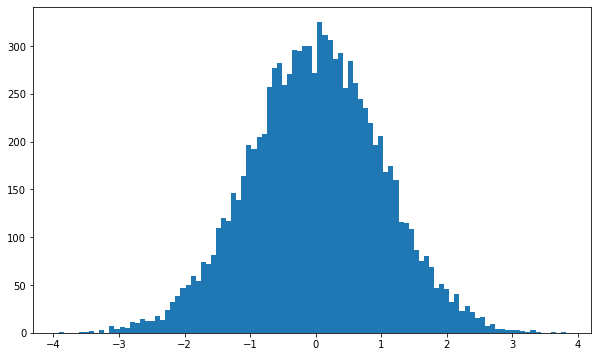

In [73]:
samples = np.random.randn(10000)
plt.hist(samples, bins=100)
plt.show()

#### `np.random.rand()` 함수  

0과 1사의 임의의 부동소수점을 균등 분포를 따르면서 지정된 수만큼 생성한다.

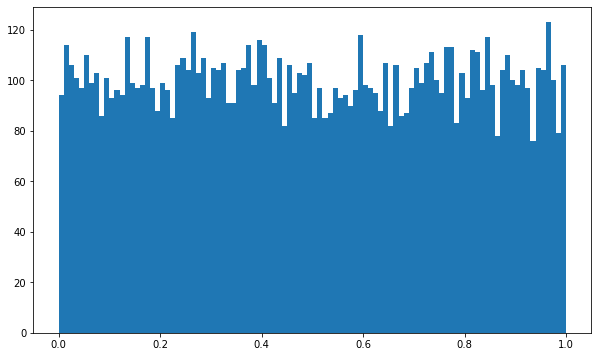

In [74]:
samples = np.random.rand(10000)
plt.hist(samples, bins=100)
plt.show()

#### `np.random.randint()` 함수  

지정된 구간 사이에서 임의의 정수를 균등 분포를 따르면서 지정된 수만큼 생성한다.

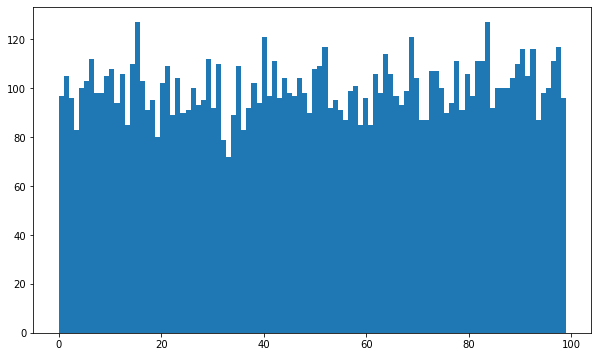

In [75]:
samples = np.random.randint(0,100,10000)
plt.hist(samples, bins=100)
plt.show()

#### 시드(seed) 기능

위에서 살펴본 무작위 함수들은 모두 실행할 때마다 조금씩 다른 무작위수를 생성한다.
하지만 시드를 지정하면 무작위 수도 동일하게 결정된다.
시드는 컴퓨터가 사용하는 난수표(random number table)의 특정 지점을 지정하는 역할을 수행한다.

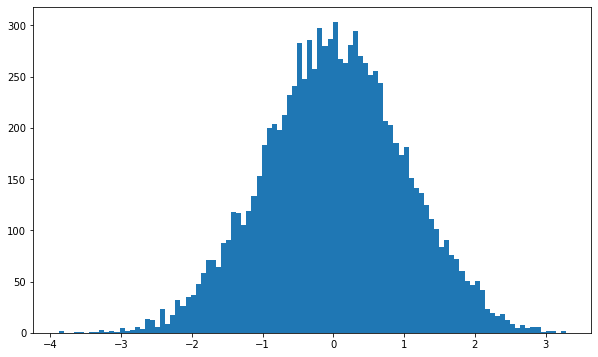

In [76]:
np.random.seed(1234)

samples = np.random.randn(10000)
plt.hist(samples, bins=100)
plt.show()

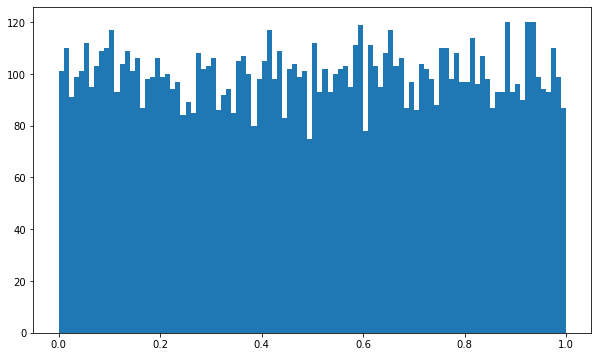

In [77]:
np.random.seed(1234)

samples = np.random.rand(10000)
plt.hist(samples, bins=100)
plt.show()

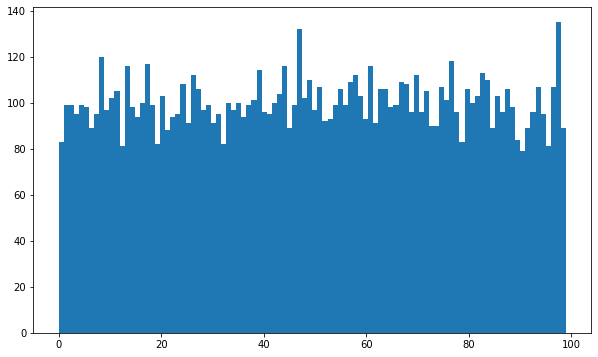

In [78]:
np.random.seed(1234)

samples = np.random.randint(0,100,10000)
plt.hist(samples, bins=100)
plt.show()

## 연습

붓꽃(아이리스) 데이터를 이용하여 활용법을 살펴 보기 위해
먼저 데이터를 인터넷 상에서 가져온다. 

In [79]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

위 주소의 `iris.data` 파일을 `datasets/iris/`라는 하위 디렉토리에 저장한다.

In [80]:
import os
import urllib.request

PATH = './datasets/iris/'
os.makedirs(PATH, exist_ok=True)
urllib.request.urlretrieve(url, PATH+'iris.data')

('./datasets/iris/iris.data', <http.client.HTTPMessage at 0x7fc1d217ba00>)

다운로드된 `iris.data` 파일에는 아래 형식의 데이터가 150개 들어 있다. 

```python
5.1,3.5,1.4,0.2,Iris-setosa
```

하나의 데이터에 사용된 값들은 하나의 아이리스(붓꽃)에 대한 꽃잎, 꽃받침과 관련된 특성(features)과 품종을 나타내며,
보다 구체적으로 아래 순서를 따른다.

```
꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비, 품종
```

In [81]:
!cat datasets/iris/iris.data | head -n 5

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


이 중에 마지막 품종 특성은 문자열이고 나머지 특성은 부동소수점, 즉 수치형 데이터이다. 
여기서는 연습을 위해 수치형 데이터를 담고 있는 네 개의 특성만 가져온다.

* `genfromtxt()` 함수: 인터넷 또는 로컬에 저장된 텍스트 데이터를 적절한 모양의 어레이로 불러오는 함수
* `delimiter=','`: 쉼표를 특성값들을 구분하는 기준으로 지정
* `usecols=[0,1,2,3]`: 리스트에 지정된 인덱스의 특성만 가져오기

In [82]:
iris_2d = np.genfromtxt(PATH+'iris.data', delimiter=',', dtype='float', usecols=[0,1,2,3])

In [83]:
iris_2d.shape

(150, 4)

처음 5개의 샘플은 앞서 살펴본 것과 동일하다.
이번에는 다만 2차원 어레이로 보일 뿐이다.

In [84]:
iris_2d[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

__문제:__ 2차원 어레이에서 결측치(`nan`)를 전혀 갖지 않은 행만 선택하는 함수 `drop_2d()`를 정의하라.

힌트: 넘파이 자체에 행을 특정 값을 갖는/갖지 않는 행을 삭제하는 기능은 없지만, `is.nan()` 함수와
부일 인덱싱을 활용할 수 있다.

#### 견본 답안

`iris_2d` 어레이를 이용하여 `drop_2d()` 함수를 어떻게 정의해야 할지 살펴보자.
먼저 `iris_2d` 어레이에 누락치의 존재 여부를 판단해야 한다.

`np.isnan()` 함수는 누락치가 있는 위치는 `True`, 나머지 위치는 `False`를 갖는 부울 어레이를 생성한다.

In [85]:
np.isnan(iris_2d)[:5]

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

만약 결측치가 있다면 `True`가 한 번 이상 사용되었기에 `any()` 메서드를 이용하여 
누착치의 존재 여부를 판단할 수 있다.

In [86]:
np.isnan(iris_2d).any()

False

그런데 누락치가 전혀 없다. 따라서 하나의 누락치를 임의로 만들어 보자.
예를 들어, 처음 5개 샘플의 꽃잎 너비(3번 열)의 값을 `nan`으로 대체하자.

In [87]:
iris_2d[:5,3] = None

In [88]:
iris_2d[:10]

array([[5.1, 3.5, 1.4, nan],
       [4.9, 3. , 1.4, nan],
       [4.7, 3.2, 1.3, nan],
       [4.6, 3.1, 1.5, nan],
       [5. , 3.6, 1.4, nan],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

이제 누락치가 존재하기에 `any()` 메서드는 `True`를 반환한다.

In [89]:
np.isnan(iris_2d).any()

True

`sum()` 함수를 이용하여 5개의 누락치가 있음을 정확하게 파악할 수도 있다. 

* `sum()` 함수: `True`는 1, `False`는 0으로 처리한다.

In [90]:
np.sum(np.isnan(iris_2d))

5

`sum()` 메서드를 사용할 수도 있다.

In [91]:
np.isnan(iris_2d).sum()

5

행 단위로 누락치의 존재를 찾기 위해 행별로 `sum()` 함수를 실행한다. 
즉, 축을 1로 지정한다.

In [92]:
np.sum(np.isnan(iris_2d), axis=1)[:10]

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

정확히 150개의 행에 대한 누락치 존재 여부를 보여준다.

In [93]:
np.sum(np.isnan(iris_2d), axis=1).shape

(150,)

이제 위 코드와 부울 인덱싱을 활용하여 누락치가 없는 행만 추출할 수 있다.

In [94]:
mask = np.sum(np.isnan(iris_2d), axis=1) == 0

In [95]:
iris_2d[mask].shape

(145, 4)

위 어레이의 처음 5개의 샘플 데이터는 `iris_2d` 어레이에서 5번에서 9번 인덱스에 위치한 샘플 데이터와 동일하다.

In [96]:
iris_2d[mask][:5]

array([[5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

이제 `drop_2d()` 함수를 다음과 같이 정의할 수 있다.

In [97]:
def drop_2d(arr_2d):
    mask = np.isnan(arr_2d).sum(axis=1) == 0
    return arr_2d[mask]

`iris_2d`에 위 함수를 적용하면 이전과 동일한 결과를 얻는다.

In [98]:
drop_2d(iris_2d)[:5]

array([[5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

__문제:__ iris_2d 데이터셋에 사용된 붓꽃들의 품종은 아래 세 개이다.

In [99]:
a = np.array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

150개의 품종을 무작위로 선택하되 `Iris-setosa` 품종이 다른 품종들의 두 배로 선택되도록 하라.

힌트: `np.random.choice()` 함수를 활용하라.

__견본답안:__

`np.random.choice()` 함수의 `p` 키워드 인자를 이용한다.
사용되는 인자는 `[0.5, 0.25, 0.25]` 이다.

In [100]:
np.random.seed(42)  # 무작위성 시드 지정
species_out = np.random.choice(a, 150, p=[0.5, 0.25, 0.25])

세 개의 이름 중에서 무작위로 150개의 이름을 선택하였다.

In [101]:
species_out.shape

(150,)

품종별 비율은 대략적으로 2:1:1 이다.

In [102]:
setosa_ratio = (species_out == 'Iris-setosa').sum()/150
versicolor_ratio = (species_out == 'Iris-versicolor').sum()/150
virginica_ratio = (species_out == 'Iris-virginica').sum()/150

print(f"세토사, 버시컬러, 비르지니카 세 품종의 비율은 {setosa_ratio:.2f}:{versicolor_ratio:.2f}:{virginica_ratio:.2f} 이다.")

세토사, 버시컬러, 비르지니카 세 품종의 비율은 0.53:0.21:0.25 이다.
